# TWITTER SENTIMENT ANALYSIS

In this notebook I have done sentiment analysis of twitter comments on airlines using NAIVE BAYES ALGORITHM 

## IMPORTING PACKAGES AND DATA 

In [1]:
import pandas as pd
tweet = pd.read_csv('twitter_airline_sentiment.csv')
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## CHECKING FOR MISSING VALUES

In [2]:
print((len(tweet)-tweet.count())/len(tweet))


tweet_id                        0.000000
airline_sentiment               0.000000
airline_sentiment_confidence    0.000000
negativereason                  0.373087
negativereason_confidence       0.281284
airline                         0.000000
airline_sentiment_gold          0.997268
name                            0.000000
negativereason_gold             0.997814
retweet_count                   0.000000
text                            0.000000
tweet_coord                     0.930396
tweet_created                   0.000000
tweet_location                  0.323292
user_timezone                   0.329235
dtype: float64


### REMOVING COLUMNS WITH HIGH VALUES > 0.9 

In [3]:
tweet.drop(['tweet_coord','airline_sentiment_gold','negativereason_gold'],axis=1,inplace=True)
print(tweet.columns)

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline', 'name',
       'retweet_count', 'text', 'tweet_created', 'tweet_location',
       'user_timezone'],
      dtype='object')


## VISUALISATION

C:\Users\shiva\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


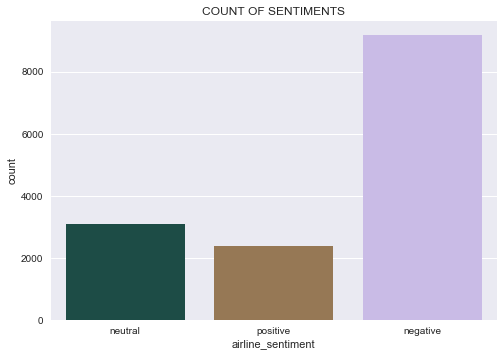

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.countplot(x='airline_sentiment',data=tweet,palette='cubehelix')
plt.title("COUNT OF SENTIMENTS")
plt.show()

### COUNTS OF SENTIMENTS WRT TO AIRLINES

counts of airlines 
 United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


C:\Users\shiva\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


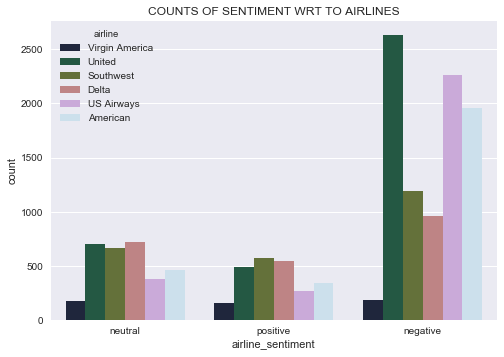

In [5]:
print('counts of airlines \n',tweet['airline'].value_counts())
sns.countplot(x='airline_sentiment',hue='airline',data=tweet,palette='cubehelix')
plt.title('COUNTS OF SENTIMENT WRT TO AIRLINES')
plt.show()

## NEGATIVE REASONS  

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


C:\Users\shiva\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


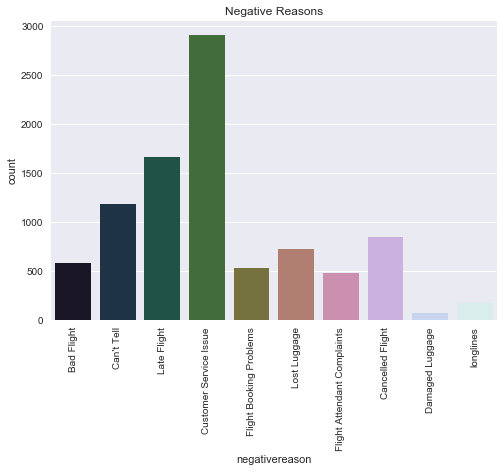

In [6]:
negative_reasons = tweet['negativereason'].value_counts()
print(negative_reasons)

sns.countplot(x='negativereason',data=tweet,palette='cubehelix')
plt.title("Negative Reasons")
plt.xticks(rotation=90)
plt.show()

### NEGATIVE REASONS WRT AIRLINES

C:\Users\shiva\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


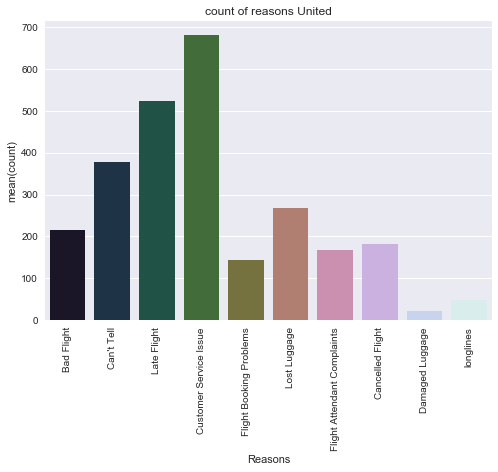

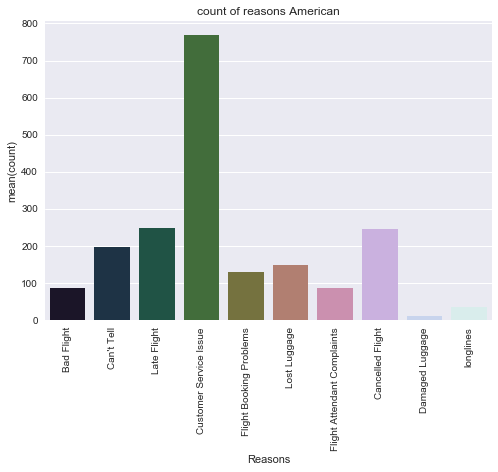

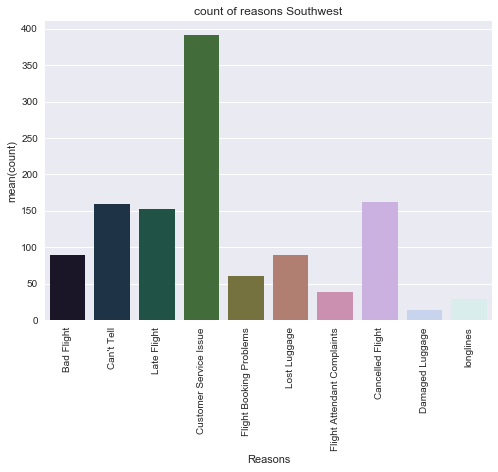

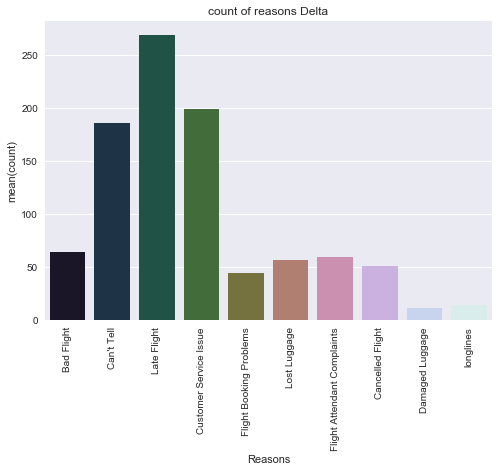

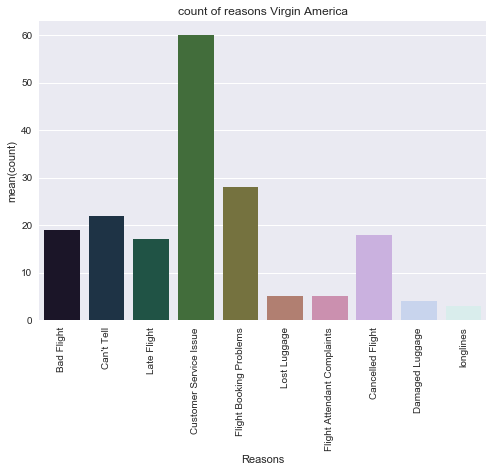

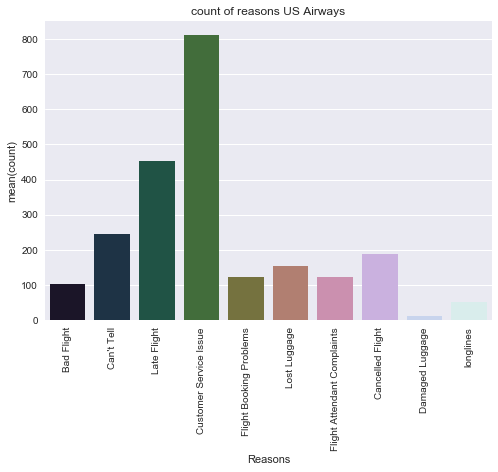

In [7]:
def Negative_count(Airline):
    if Airline=='All':
        df=tweet
    else:
        df = tweet[tweet['airline']==Airline]
        count = dict(df['negativereason'].value_counts())
        Unique_reason = list(tweet['negativereason'].unique())
        Unique_reason = [x for x in Unique_reason if str(x) != 'nan']
        Reason_frame  = pd.DataFrame({'Reasons':Unique_reason})
        Reason_frame['count'] = Reason_frame['Reasons'].apply(lambda x:count[x])
        return Reason_frame

def plot(Airline):
    df = Negative_count(Airline)
    sns.barplot(x="Reasons", y="count", data=df,palette='cubehelix')
    plt.title('count of reasons '+Airline)
    plt.xticks(rotation=90)
    plt.show()
    
plot('United')
plot('American')
plot('Southwest')
plot('Delta')
plot('Virgin America')
plot('US Airways')

## WORD CLOUD OF NEGATIVE WORDS

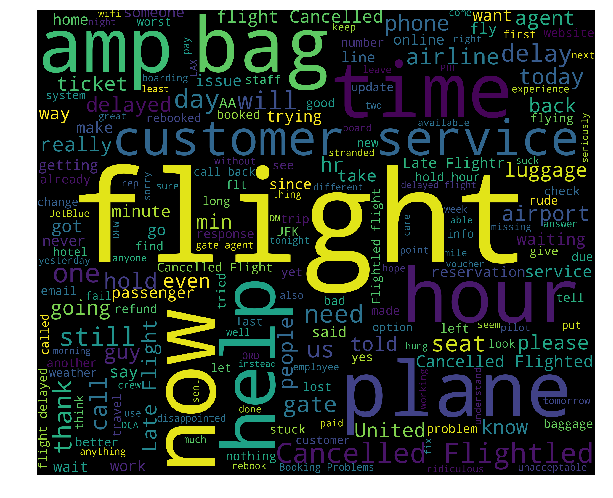

In [8]:
from wordcloud import WordCloud,STOPWORDS
df = tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                        if 'http' not in word
                        and not word.startswith('@')
                        and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',
                      width=3000,height=2500).generate(cleaned_word)

plt.figure(1,figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## PREPROCESSING DATA FOR MODELLING

In [9]:
import re
import nltk
from nltk.corpus import stopwords

def tweet_to_words(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]"," ",raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(" ".join(meaningful_words))

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]"," ",raw_tweet)
    words = letters_only.lower().split()
    stops = set(stopwords.words("english"))
    meaningful_words = [w for w in words if not w in stops]
    return(len(meaningful_words))

tweet['sentiment'] = tweet['airline_sentiment'].apply(lambda x : 0 if x=='negative' else 1)
tweet['clean_tweet'] = tweet['text'].apply(lambda x: tweet_to_words(x))
tweet['Tweet_length'] = tweet['text'].apply(lambda x: clean_tweet_length(x))
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,sentiment,clean_tweet,Tweet_length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1,virginamerica dhepburn said,3
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1,virginamerica plus added commercials experienc...,6
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1,virginamerica today must mean need take anothe...,8
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0,virginamerica really aggressive blast obnoxiou...,11
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0,virginamerica really big bad thing,5


## NAIVE BAYES CLASSIFIER

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split 
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

C:\Users\shiva\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### SPLITTING DATA FOR TRAINING AND TESTING
### CONVERTING DATA TO INTEGRAL FROM USING COUNT VECTORIZER

In [11]:
y = tweet.sentiment
X_train, X_test, y_train, y_test = train_test_split(tweet['clean_tweet'], y, test_size=0.33, random_state=53)
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

### FITING THE MODEL 

In [12]:
nb_classifier = MultinomialNB()
nb_classifier.fit(count_train,y_train)
pred = nb_classifier.predict(count_test)

## ACCURACY AND CONFUSION MATRIX 

In [13]:
score = metrics.accuracy_score(y_test,pred)
print(score*100,"%")

81.8708609272 %


### CONFUSION MATRIX

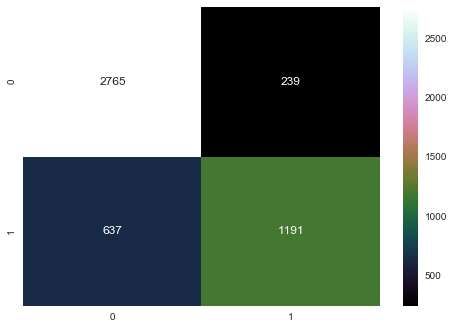

In [14]:
cm = metrics.confusion_matrix(y_test,pred)
sns.heatmap(cm,cmap='cubehelix',annot=True,fmt='')
plt.show()

### ROC CURVE

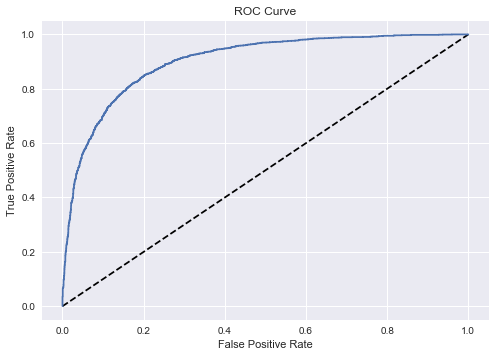

In [15]:
from sklearn.metrics import roc_curve
nb_classifier.fit(count_train,y_train)
y_pred_prob  =  nb_classifier.predict_proba(count_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='random forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()